<div style="text-align: center"><b><span style="color:#08838b; font-family:Georgia; font-size:2.5em;">EDA, in order to predict if the patient is more susceptible, or not, to a possible heart attack</span></b></div>



**Feedbacks and suggestions will be greatly appreciated**

![](https://s.marketwatch.com/public/resources/images/MW-GC908_heart__ZG_20180201153921.jpg)

In [1]:
#importing libraries
import numpy as np
import pandas as pd

import warnings as warnings
warnings.filterwarnings("ignore")

from datetime import datetime, timedelta

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../input/heart-disease-uci/heart.csv")

print("HEART DISEASE DATASET : ")
data

HEART DISEASE DATASET : 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
#array of all columns
print(data.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


### <div style="text-align: center"><b><span style="color:#08838b; font-family:Georgia; font-size:2.5em;">Description of columns</span></b></div>



*  cp: chest pain type
* -- Value 1: typical angina
* -- Value 2: atypical angina
* -- Value 3: non-anginal pain
* -- Value 4: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/d
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
* -- Value 0: normal
* -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* 
* thalach : maximum heart rate achieved.
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* -- Value 1: upsloping
* -- Value 2: flat
* -- Value 3: downslopin
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target: diagnosis of heart disease (angiographic disease status)
* -- Value 0: < 50% diameter narrowing
* -- Value 1: > 50% diameter narrowing

In [4]:
# checking total no. of rows and columns present in original datset
data.shape

(303, 14)

### <div style="text-align: center"><b><span style="color:#08838b; font-family:Georgia; font-size:2.5em;">Data Cleaning</span></b></div>

In [5]:
# getting information about total non-null values and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# to get percentage of null values present in all columns respectively
round(data.isnull().sum()*100/len(data),2)

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

* No null values present in dataset. We are good to go!

### <div style="text-align: center"><b><span style="color:#08838b; font-family:Georgia; font-size:2.5em;">Data Analysis</span></b></div>

In [7]:
# firstly we will make a copy of our original dataset to perform further actions
data_to_use = data.copy()

## Visualising Numeric Variables
### Let's make a pairplot of all the numeric variables
* Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

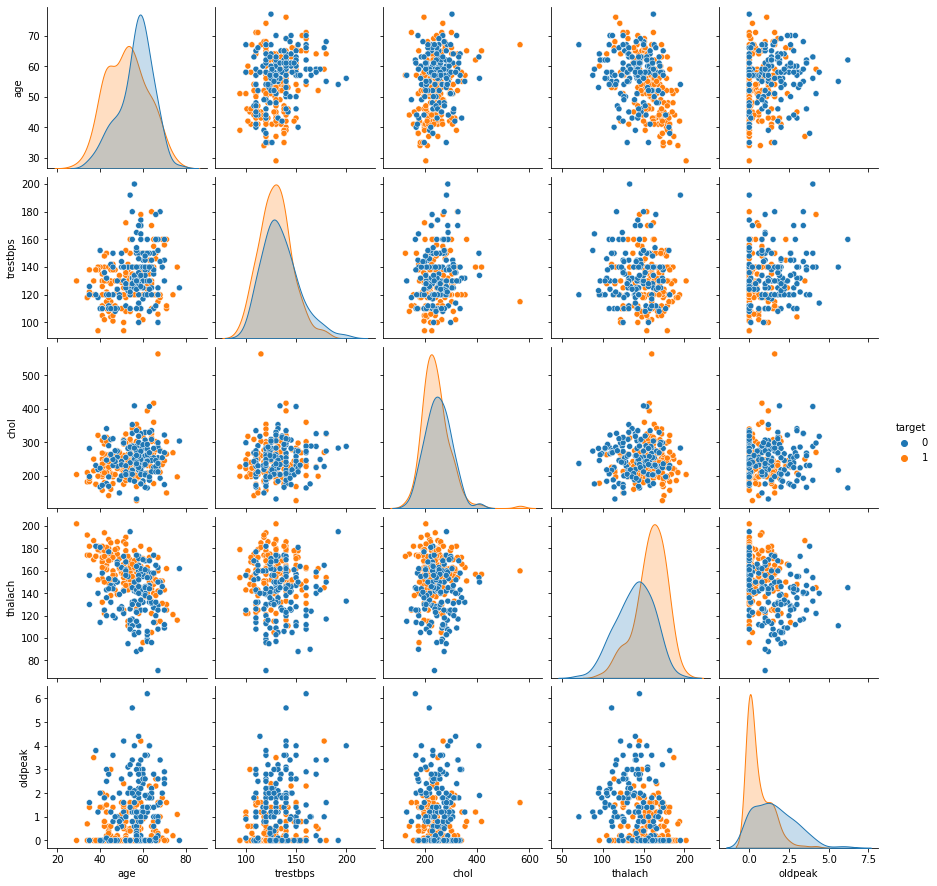

In [8]:
# Visualizing the 
contdata = data_to_use[["age","trestbps","chol","thalach","oldpeak","target"]].copy()

sns.pairplot(contdata ,hue = "target" )
plt.show()

### Let's make a heatmap of all the numeric variables
* Heatmap is also used to understand the best set of features to explain a relationship between two variables .
* It is usually not used that much in drawing any final conclusions but a great way to visualize the reklation between features by looking at the different color representation of them.
* The heat map shows the relative intensity of values captured by your eye tracker by assigning each value a color representation.

               age  trestbps      chol   thalach   oldpeak    target
age       1.000000  0.279351  0.213678 -0.398522  0.210013 -0.225439
trestbps  0.279351  1.000000  0.123174 -0.046698  0.193216 -0.144931
chol      0.213678  0.123174  1.000000 -0.009940  0.053952 -0.085239
thalach  -0.398522 -0.046698 -0.009940  1.000000 -0.344187  0.421741
oldpeak   0.210013  0.193216  0.053952 -0.344187  1.000000 -0.430696
target   -0.225439 -0.144931 -0.085239  0.421741 -0.430696  1.000000


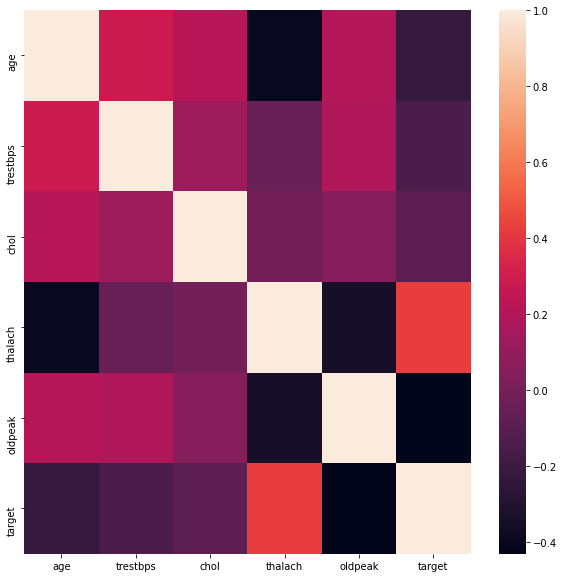

In [9]:
print(contdata.corr())
plt.figure(figsize=(10,10))
sns.heatmap(contdata.corr())
plt.show()

## Visualising Categorical Variables
### As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.
* How outliers are (for a normal distribution).
* What a “minimum” and a “maximum” are.

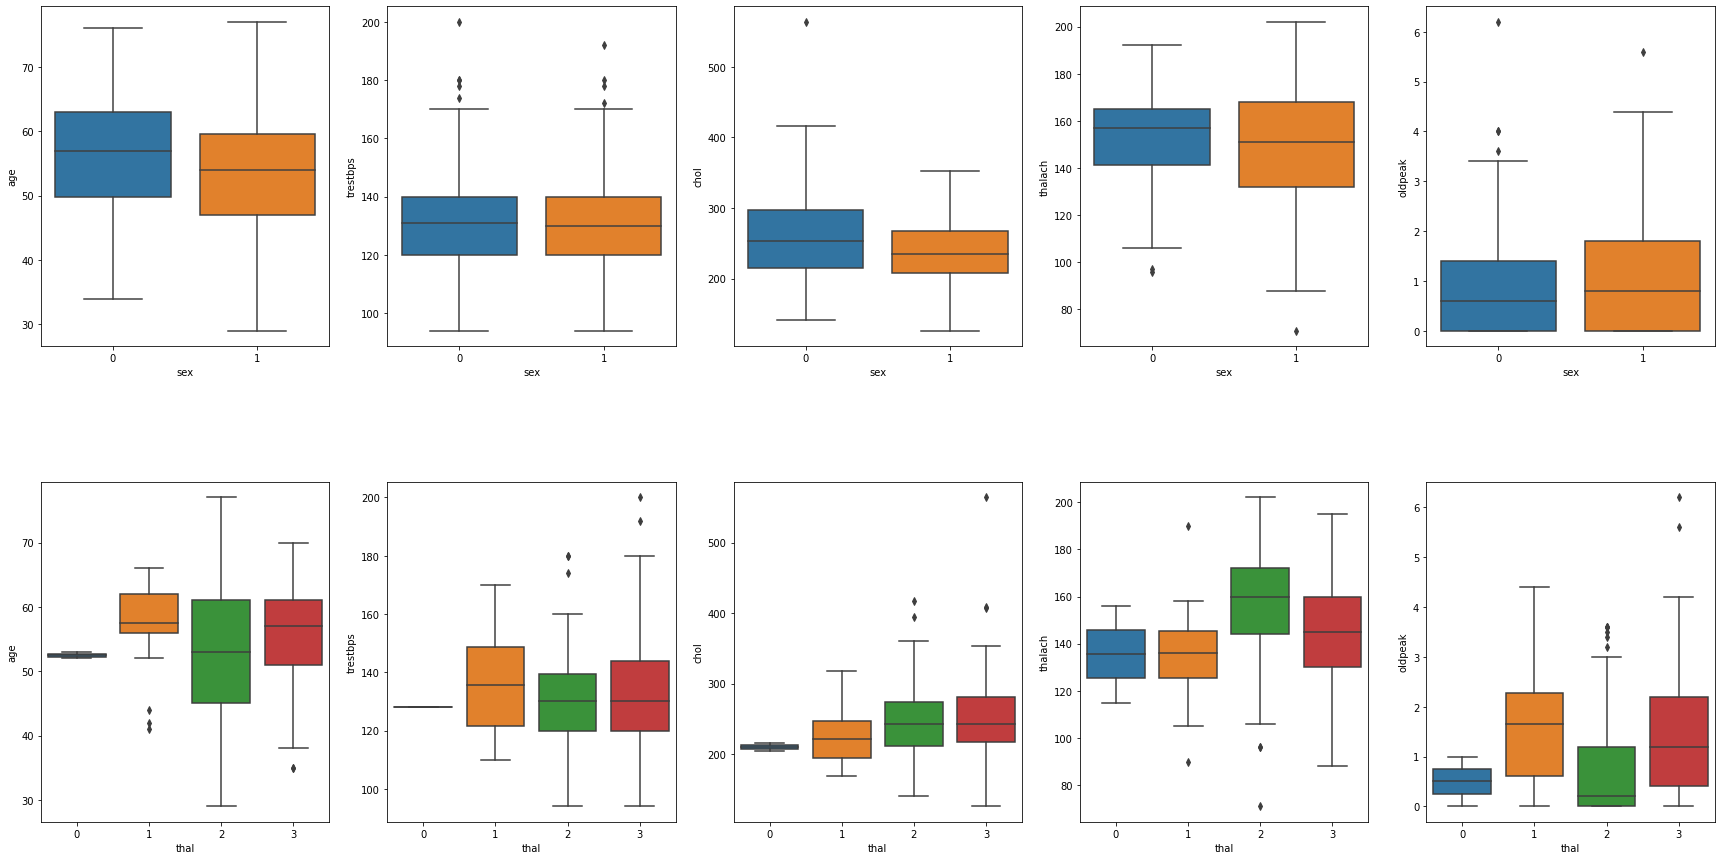

In [10]:
categdata_to_use_in_boxplot = data_to_use[['sex','thal']].copy()
categdatalist = categdata_to_use_in_boxplot.columns.values.tolist()
contdata = contdata.drop("target",axis = 1)
contdatalist = contdata.columns.values.tolist()

plt.figure(figsize=(30,15))

a = 1
for i in enumerate(categdatalist):
    for j in enumerate(contdatalist):
        plt.subplot(2,5,a)
        sns.boxplot(x=i[1], y= j[1], data=data_to_use)
        a +=1
        
plt.subplots_adjust(hspace = 0.4)
plt.show()

#### Observations:
##### By observing boxplots of sex against different features we will see that there is not much difference in both male and female, 50th percentile of age being slightly above in female  is a exception.
* Resting Blood Pressure is same in both sexes
* Cholestrol level is slightly more in female compared to male.

##### By observing boxplots of thal(a blood disorder called thalassemia) against different features,there is different variations in different plots.
* Thal **value of 2**(normal blood flow) has lowest minimum and highest maximum which denotes its relationship against age
* Thal **value of 1**(Value 1: fixed defect (no blood flow in some part of the heart)) against age is between **50 and 70 years old.**
* Thal value of 3(reversible defect (a blood flow is observed but it is not normal)) against age have its median at **58 years** old approximately.

* Thal value **1** and Thal value **3** is showing similar trend in thal vs oldpeak plot.
* In thal vs chol plot we can see that the medians of thal values are increasing as values are increasing which shows that  cholestrol level and thalessemia are positively correlated.
* Most of the observations related to resting blood pressure is almost similar with different thal values.

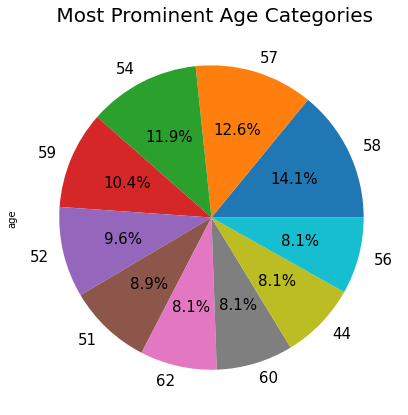

In [11]:
plt.figure(figsize=(7,7))
df = data.age.value_counts().to_frame()
textprops = {"fontsize":15}
df.head(10).age.plot(kind='pie',autopct='%1.1f%%',textprops =textprops )

plt.title(" Most Prominent Age Categories",fontsize = 20)
plt.show()

#### Observations:
* Most prominent age in the dataset is **58 years old** with **14.1%**.
* We can see from the pie plot that the person present in the dataset mostly belongs to age group between **50 -60 years old.**
* However it is a very small dataset with very limited amount of observations so we can't make age a deciding factor.


## Let's visualize more about some important relation between features and target variable
### Histogram plot

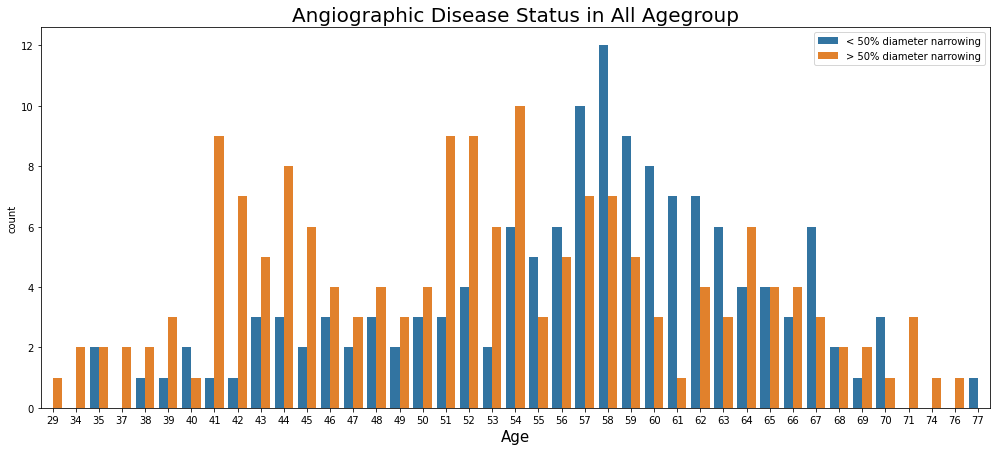

In [12]:
plt.figure(figsize=(17,7))
ax = sns.countplot(x="age", hue="target", data=data_to_use)
plt.title("Angiographic Disease Status in All Agegroup",fontsize = 20)
plt.legend(["< 50% diameter narrowing","> 50% diameter narrowing"],loc='upper right')
plt.xlabel("Age",fontsize = 15)
plt.show()

#### Observations:
### According to dataset if we try to draw some conclusions on the basis of this plot then we conclude that,
* The orange bars shows that the person is at higher risk getting a heart attack and the blue bars shows that person is at less risk.
* The **age group 51-60 years old** is at more risk.
* Due to lack of more observations and small dataset we can see that in young people also there is more risk than old people but this doesn't implies that old people are at less risk than young people.

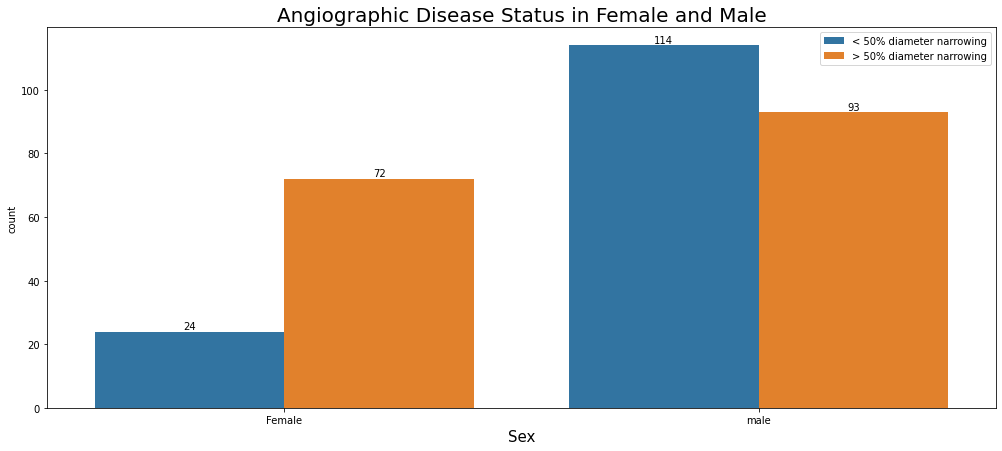

In [13]:
x = ["Female","male"]
values = range(len(x))

plt.figure(figsize=(17,7))
ax = sns.countplot(x="sex", hue="target", data=data_to_use)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 10)
plt.title("Angiographic Disease Status in Female and Male",fontsize = 20)
plt.legend(["< 50% diameter narrowing","> 50% diameter narrowing"],loc='upper right')
plt.xlabel("Sex",fontsize = 15)
plt.xticks(values,x)
plt.show()

#### Observations
* Females which are at less risk are less(**24**) and which are at higher risk are three times of lower risk females(**72**).
* More male are at less risk(**114**) than male which are at higher risk(**93**).

### Violin plot used for categorical data
* Analyzing relationship between age and sex with target variable in single plot

<Figure size 720x504 with 0 Axes>

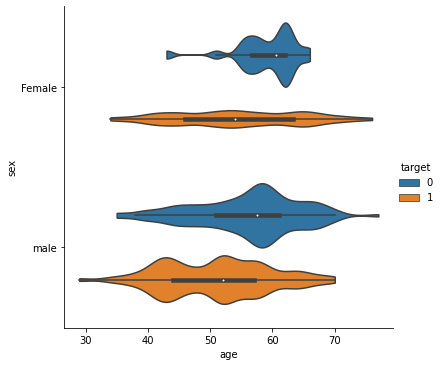

0 : < 50% diameter narrowing
1 : > 50% diameter narrowing


In [14]:
plt.figure(figsize=(10,7))
sns.catplot(x="age", y="sex",
            hue="target",
            data=data_to_use,
            orient="h", height=5, aspect=1, palette="tab10",
            kind="violin", dodge=True, cut=0, bw=.2)

plt.yticks(values,x)
plt.show()
print("0 : < 50% diameter narrowing\n1 : > 50% diameter narrowing")

#### Observations:
* This plot is basically to visualize our both previous plots in same plot.
* Here we can see peaks in violin to analyze the age and its  pattern for quartiles in both male and female to visualize our previous observations in both plot together with respect to age,sex and target.
* Most visible difference in pattern  is seen in Female violin plot.
* We can see there are very less outliers in dataset.

### Probablity Density Plot of Some More Features

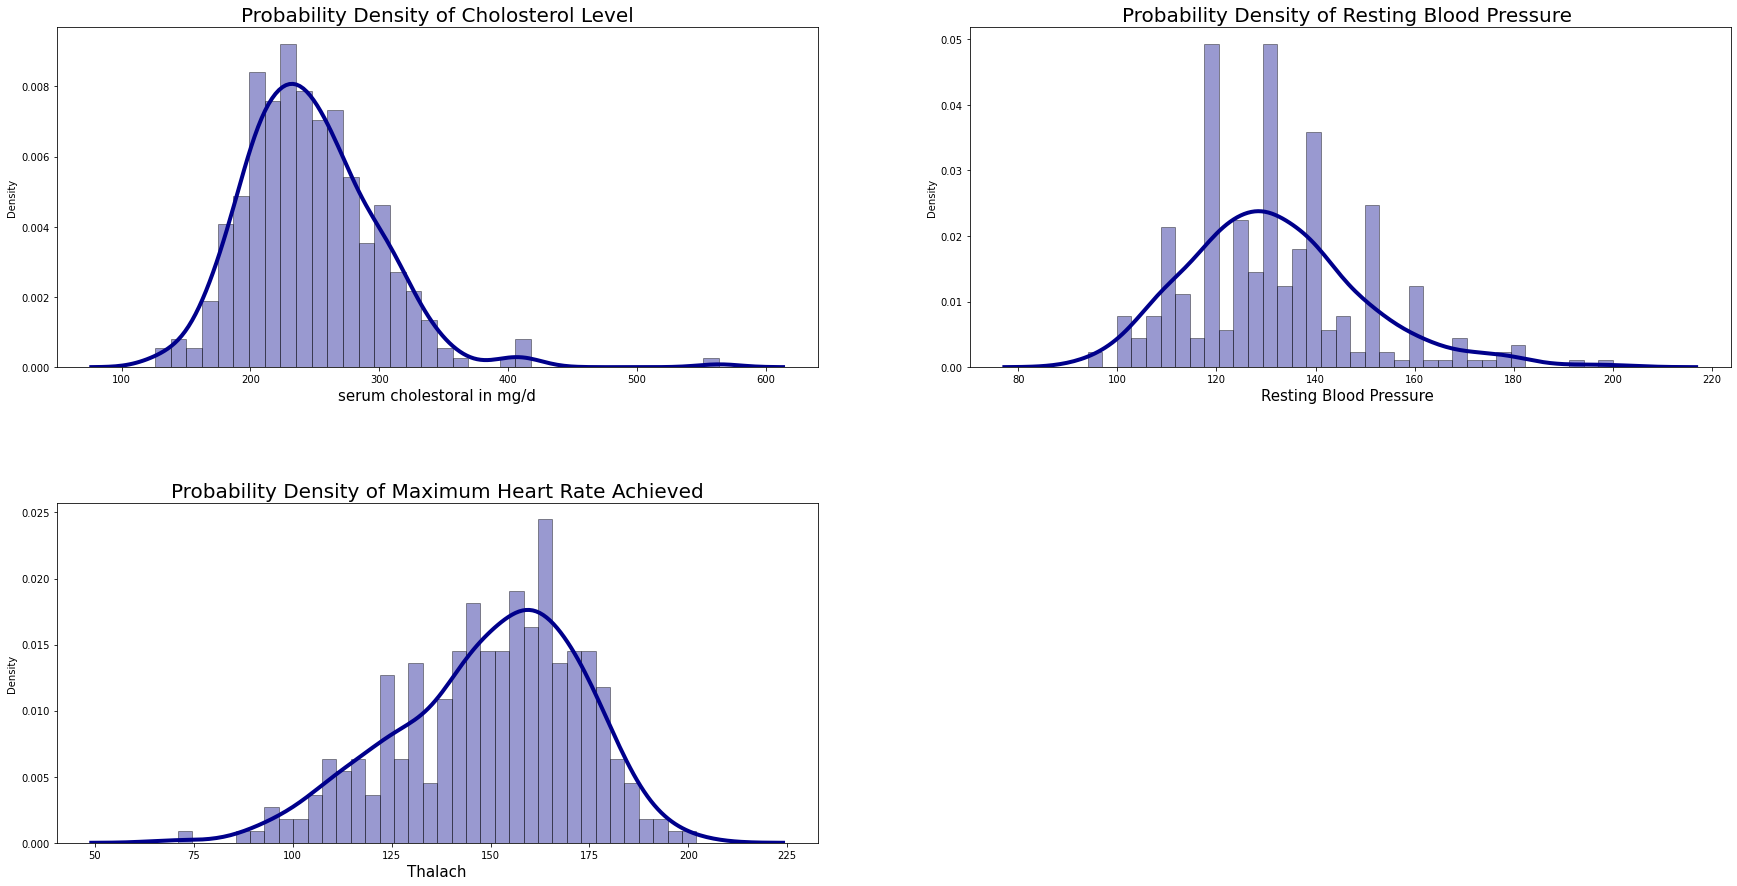

In [15]:
plt.figure(figsize = (30,15))
a = 1
for i in ["chol","trestbps","thalach"]:
    
    plt.subplot(2,2,a)
    sns.distplot(data_to_use[i],hist=True, kde=True, 
                 bins=int(180/5), color = 'darkblue', 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4})
    if i=="chol":
        
        plt.title("Probability Density of Cholosterol Level",fontsize = 20)
        plt.xlabel("serum cholestoral in mg/d",fontsize = 15)
    
    elif i == "thalach":
        plt.title("Probability Density of Maximum Heart Rate Achieved",fontsize = 20)
        plt.xlabel("Thalach",fontsize = 15)
        
    else:
        plt.title("Probability Density of Resting Blood Pressure ",fontsize = 20)
        plt.xlabel("Resting Blood Pressure ",fontsize = 15)
    a+=1
    
plt.subplots_adjust(hspace = 0.4)        
plt.show()

#### observations:
* Most common cholosterol level present in dataset is **230 mg/d** and  with some very less probablity density there are some at **400 mg/d** and between **500mg/d** and **600mg/d**
* Resting blood pressure at **120** and **125** have highest probablity density of **0.05**.
* Probablity density of Thalach is mostly evenly distributed between **140** and **175**.
* Highest probablity is of maximum heart rate nearly at **165**

### Line plot of cholosterols level in male and female with their ages

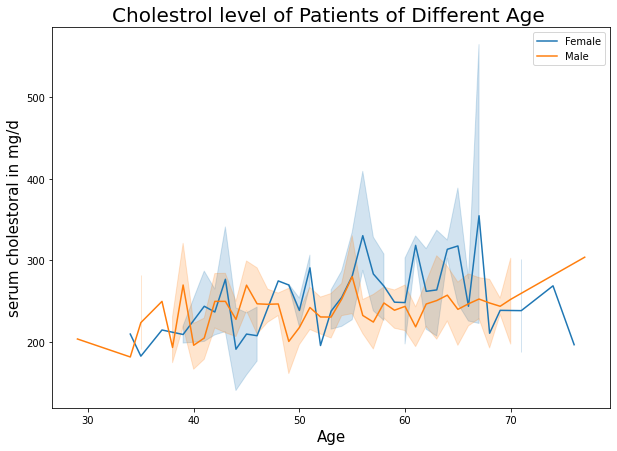

In [16]:
plt.figure(figsize = (10,7))
sns.lineplot(data=data_to_use, x="age", y="chol",hue = "sex")
plt.title("Cholestrol level of Patients of Different Age ",fontsize = 20)
plt.ylabel("serum cholestoral in mg/d",fontsize = 15)
plt.xlabel("Age",fontsize = 15)
plt.legend(["Female", "Male"], loc ="upper right")
plt.show()

#### Observations:
* Serum cholestrol level in Female is higher than Male between the age of 52 years to 68 years.
* serum cholesterol levels can help your doctor figure out your risk for developing heart disease

#### Data preparation

In [17]:
X = data_to_use.drop("target",axis =1)
y = data_to_use["target"]

datalist = data.columns.values.tolist()
datalist.remove("target")

<div style="text-align: center"><b><span style="color:#08838b; font-family:Georgia; font-size:2.5em;">Model Building -  Logistic Regression</span></b></div>

* Before applying Logistic Regression ,
* We will split the data into train-test set.
* Then data will be scaled.
* For continuos data Normalization technique (MinMaxscaler) is used.
* for categorical data Mean encoding technique is used.



#### Splitting the dataset into train and test dataset

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.25, random_state=120)

#### Scaling of Train Data 

In [19]:
# Target Mean Encoding for categorical columns in train data

for i in ['age','cp','restecg','slope','ca','thal'] :
    Mean_encoded_variable = data_to_use.groupby([i])['target'].mean().to_dict()

    X_train[i] =  X_train[i].map(Mean_encoded_variable)

# Normalization for continuos column in train data    

scaler = MinMaxScaler()
num_vars = ['trestbps', 'chol', 'thalach', 'oldpeak']

# Fit on object

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

#### Training of the Model using Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

model= LogisticRegression()

model.fit(X_train, y_train)
trainscore =  model.score(X_train,y_train)


#### Scaling of Test Data and Applying Test Data on Model

In [21]:
# Target Mean Encoding on categorical columns in test data
for i in ['age','cp','restecg','slope','ca','thal'] :
    Mean_encoded_variable1 = data_to_use.groupby([i])['target'].mean().to_dict()

    X_test[i] =  X_test[i].map(Mean_encoded_variable1)
    
# Normalization for continuos columns in test data  

X_test[num_vars] = scaler.fit_transform(X_test[num_vars]) 

testscore =  model.score(X_test,y_test)  

#### Test Score and Train Score

In [22]:
print("test score: {} \ntrain score: {}".format(testscore*100,trainscore*100),'\n')

y_pred =  model.predict(X_test)

test score: 89.47368421052632 
train score: 84.14096916299559 



#### Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix : \n",confusion_matrix(y_test, y_pred))

Confusion Matrix : 
 [[30  3]
 [ 5 38]]


#### Different Classification Metrics

In [24]:
from sklearn.metrics import classification_report,accuracy_score,f1_score,precision_score,recall_score,roc_curve,roc_auc_score

print(' f1 score: ',f1_score(y_test, y_pred)*100,'\n')
print(' precision score: ',precision_score(y_test, y_pred)*100,'\n')
print(' recall score: ',recall_score(y_test, y_pred)*100,'\n')
print("Classification report: \n",classification_report(y_test, y_pred))

 f1 score:  90.47619047619047 

 precision score:  92.6829268292683 

 recall score:  88.37209302325581 

Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.91      0.88        33
           1       0.93      0.88      0.90        43

    accuracy                           0.89        76
   macro avg       0.89      0.90      0.89        76
weighted avg       0.90      0.89      0.90        76



In [25]:
probabilityValues = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_pred)
print("AUC Score: ",auc*100)

AUC Score:  89.64059196617336


#### ROC Curve

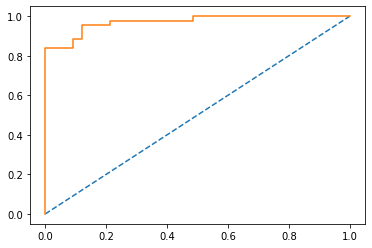

In [26]:
fpr,tpr, threshold =  roc_curve(y_test,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)